 Write a code in Python to generate synthetic data to showcase the Employee Performance Dataset where we simulate 1,000 employees with features like age, department, years of experience, performance score, salary, training hours etc.
Visualize the following KPIs using matplotlib and seaborn and gather insights from it:
-	Employee distribution per department
-	Average salary per department
-	Learning investment by department
-	Relationship between training and performance
-	Department-wise WLB health


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(42)

In [4]:
n_employees = 1000
departments = ['Engineering', 'HR', 'Sales', 'Marketing', 'Finance', 'Operations']


In [5]:
data = {
    "Employee_ID": range(1, n_employees + 1),
    "Age": np.random.randint(22, 60, n_employees),
    "Department": np.random.choice(departments, n_employees, p=[0.30, 0.10, 0.20, 0.15, 0.15, 0.10]),
    "Years_Experience": np.round(np.random.uniform(0, 35, n_employees), 1),
    "Training_Hours": np.random.poisson(lam=40, size=n_employees),
    "Work_Life_Balance": np.random.randint(1, 6, n_employees)  # 1 (Poor) → 5 (Excellent)
}

df = pd.DataFrame(data)

In [6]:
dept_salary_base = {
    "Engineering": 70000,
    "HR": 45000,
    "Sales": 55000,
    "Marketing": 50000,
    "Finance": 65000,
    "Operations": 48000
}

df["Salary"] = df.apply(
    lambda x: dept_salary_base[x["Department"]] + (x["Years_Experience"] * 2000) + np.random.randint(-5000, 5000),
    axis=1
)

In [7]:
df["Performance_Score"] = (
    50
    + (df["Years_Experience"] * 0.8)
    + (df["Training_Hours"] * 0.3)
    + np.random.normal(0, 8, n_employees)
)

df["Performance_Score"] = df["Performance_Score"].clip(40, 100)

print(df.head())

   Employee_ID  Age Department  Years_Experience  Training_Hours  \
0            1   50      Sales              19.0              45   
1            2   36  Marketing              22.3              55   
2            3   29         HR               7.7              43   
3            4   42    Finance              34.2              39   
4            5   40      Sales              26.2              41   

   Work_Life_Balance    Salary  Performance_Score  
0                  4   92155.0          63.557903  
1                  4   97078.0          86.831927  
2                  4   64119.0          59.557878  
3                  4  137615.0          85.881414  
4                  3  109017.0          87.534919  


Visualizations

C:\Users\shara\AppData\Local\Temp\ipykernel_22904\3708598566.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Department", palette="Set2")


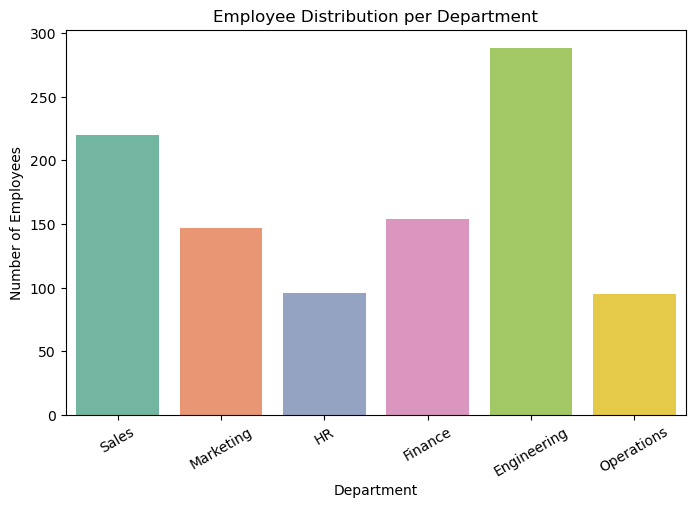

In [8]:
#Employee Distribution per Department
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Department", palette="Set2")
plt.title("Employee Distribution per Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=30)
plt.show()


C:\Users\shara\AppData\Local\Temp\ipykernel_22904\3147463006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


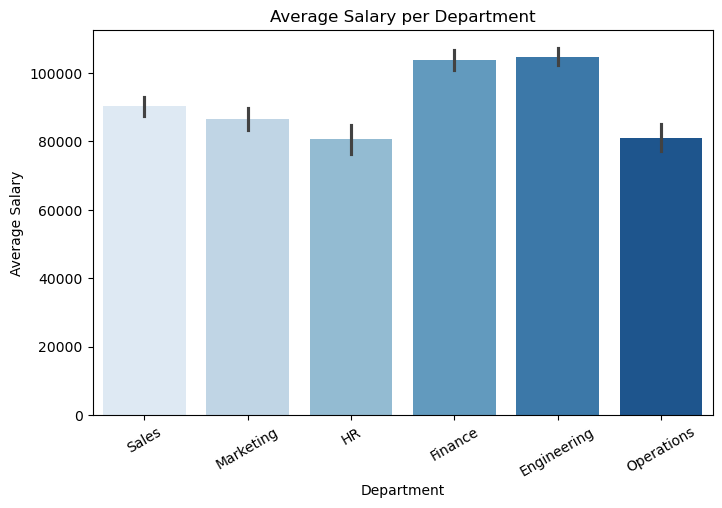

In [9]:
#Average Salary per Department
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="Department",
    y="Salary",
    estimator=np.mean,
    palette="Blues"
)
plt.title("Average Salary per Department")
plt.ylabel("Average Salary")
plt.xticks(rotation=30)
plt.show()


C:\Users\shara\AppData\Local\Temp\ipykernel_22904\1765197754.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


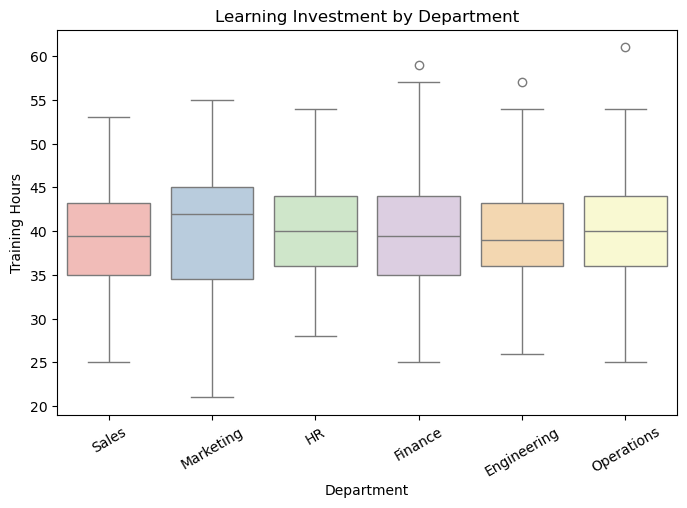

In [10]:
#Learning Investment by Department (Training Hours)
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="Department",
    y="Training_Hours",
    palette="Pastel1"
)
plt.title("Learning Investment by Department")
plt.ylabel("Training Hours")
plt.xticks(rotation=30)
plt.show()


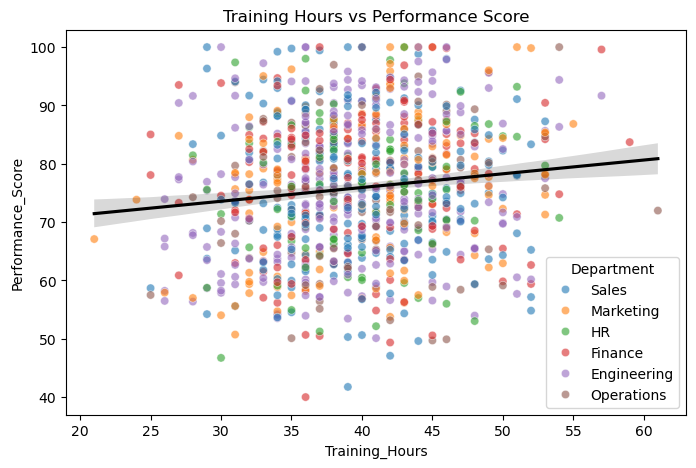

In [11]:
#Relationship Between Training and Performance
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="Training_Hours",
    y="Performance_Score",
    hue="Department",
    alpha=0.6
)
sns.regplot(
    data=df,
    x="Training_Hours",
    y="Performance_Score",
    scatter=False,
    color="black"
)
plt.title("Training Hours vs Performance Score")
plt.show()


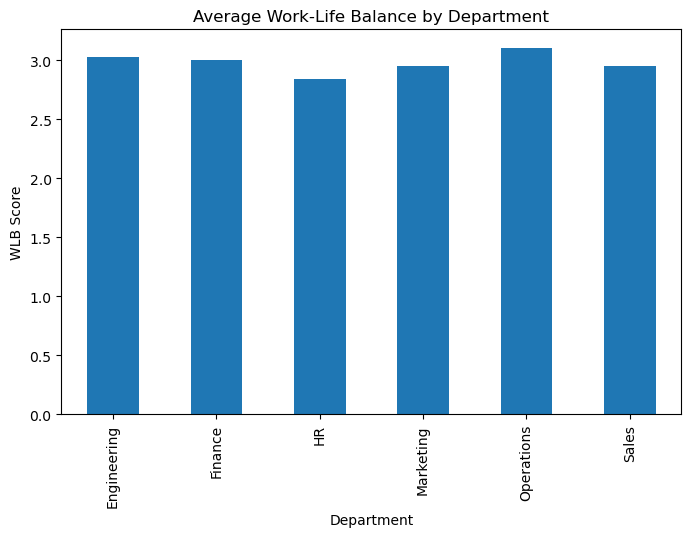

In [12]:
#Department-wise Work-Life Balance (WLB)
plt.figure(figsize=(8, 5))
 
df.groupby("Department")["Work_Life_Balance"].mean().plot(kind="bar")
plt.title("Average Work-Life Balance by Department")
plt.xlabel("Department")
plt.ylabel("WLB Score")
plt.show()



2 Using the indian_food.csv dataset provided, visualize the following:
-	Count of vegetarian and non-vegetarian consumers using bar graph
-	Count of unique dishes in this dataset
-	Count of unique flavored dishes in this dataset


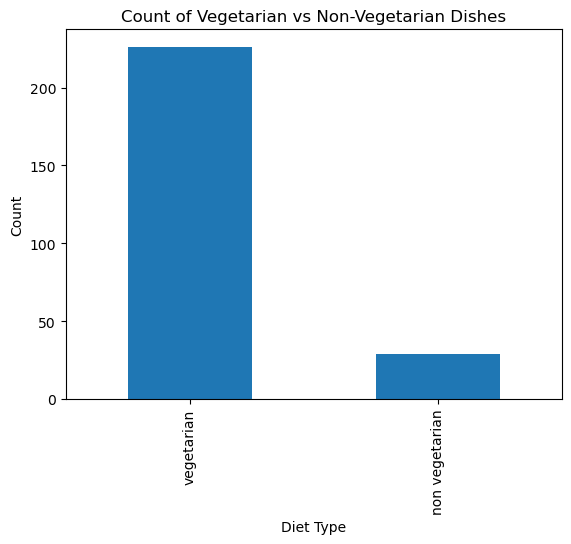

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\shara\\OneDrive\\Documents\\Winter-pep\\Second-day\\indian_food.csv")

df["diet"].value_counts().plot(kind="bar")
plt.title("Count of Vegetarian vs Non-Vegetarian Dishes")
plt.xlabel("Diet Type")
plt.ylabel("Count")
plt.show()


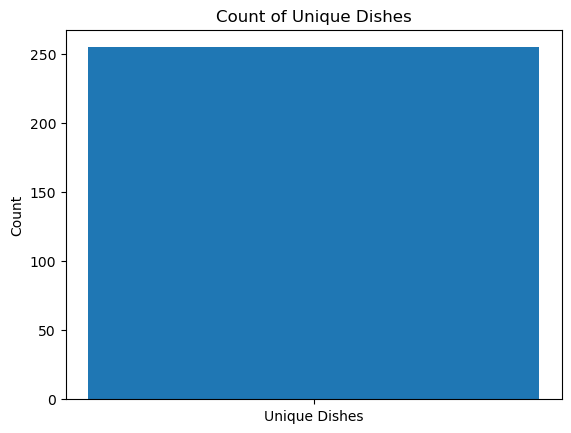

In [14]:
unique_dishes = df["name"].nunique()

plt.bar(["Unique Dishes"], [unique_dishes])
plt.title("Count of Unique Dishes")
plt.ylabel("Count")
plt.show()


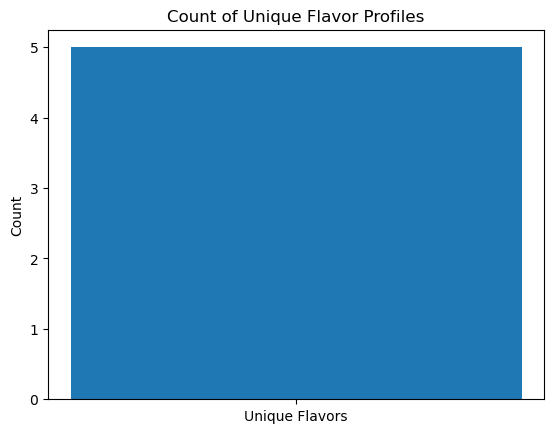

In [15]:
unique_flavors = df["flavor_profile"].nunique()

plt.bar(["Unique Flavors"], [unique_flavors])
plt.title("Count of Unique Flavor Profiles")
plt.ylabel("Count")
plt.show()
